# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [1]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [2]:
import pandas as pd

Import project files

In [3]:
#import sys
#sys.path.append("utils")
# from utils import models

In [4]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [5]:
train_file = 'data/df_filtered_1000.csv'

Getting dataframe

In [6]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 0 ns
Wall time: 9 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [7]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 24.7 s
Wall time: 26.4 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [8]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.7651676497117053
CPU times: total: 1.2 s
Wall time: 1.05 s


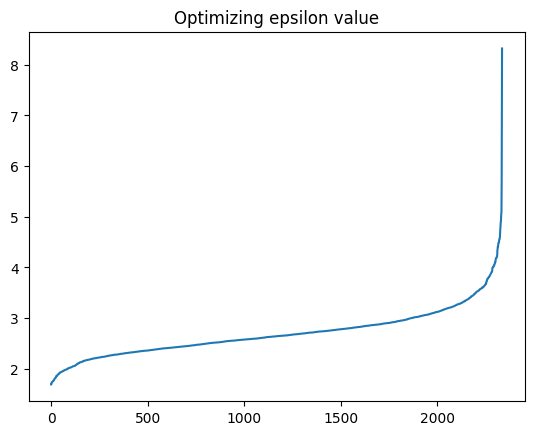

In [9]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [10]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

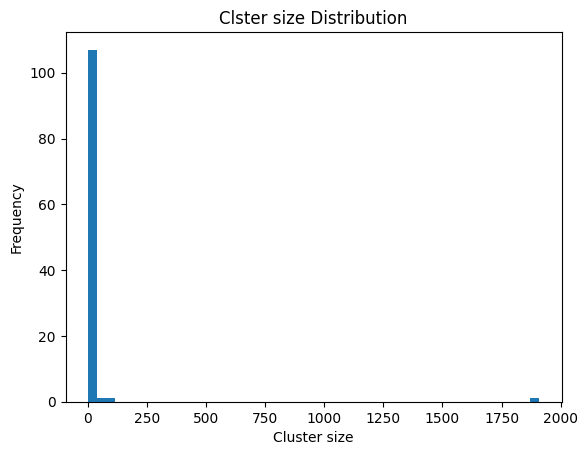

In [11]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

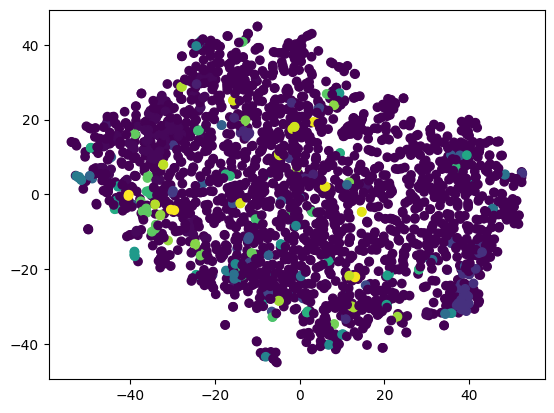

CPU times: total: 1min 5s
Wall time: 26.5 s


In [12]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.053744078


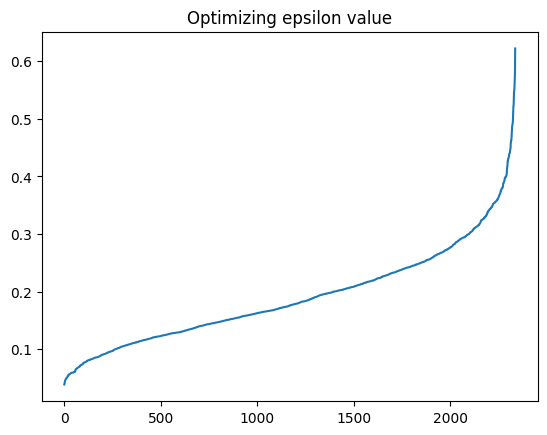

In [13]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

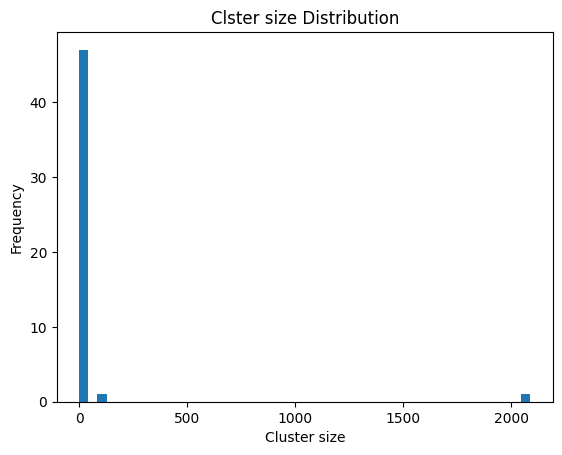

In [14]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

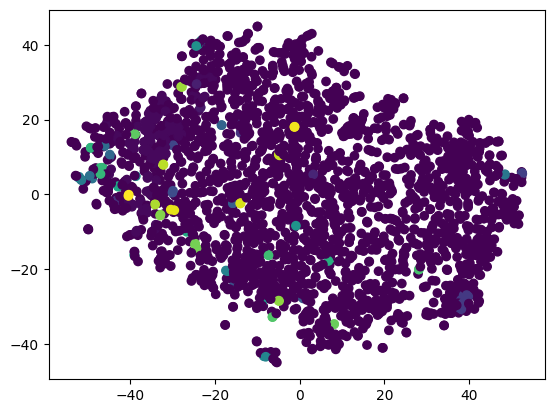

CPU times: total: 57.2 s
Wall time: 24.8 s


In [15]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [16]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

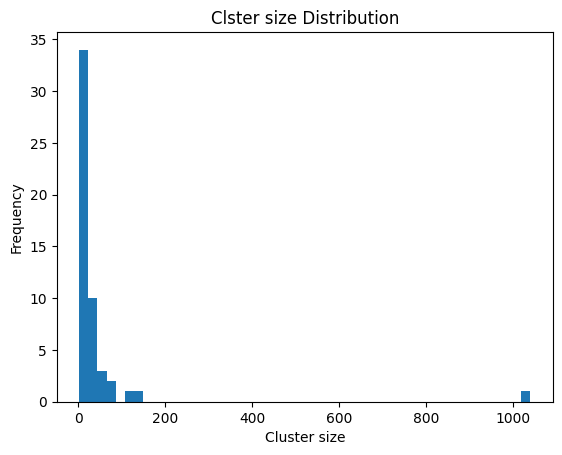

In [17]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

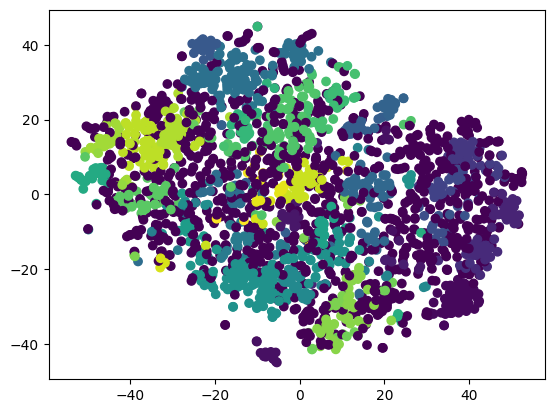

In [18]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [19]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 110 clusters
Cosine distance:	 49 clusters
HDBSCAN clustering:	 52 clusters


Plotting Jaccard index histogram

In [20]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['hi', 'love', 'banana', 'chocolate', 'cola']

Getting distance threshold

In [21]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [22]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.1423817 	replacing ['combo', 'tube'] in pack
distance: 0.32809252 the next cluster is too wide and wont be replaced: ['hell', 'four', 'think', 'normally', 'although', 'surprised', 'bad', 'mind', 'life', 'whether', 'leave', 'unfortunately', 'give', 'know', 'else', 'basically', 'definitely', 'yeah', 'take', 'apparently', 'dude', 'especially', 'many', 'well', 'necessary', 'maybe', 'unless', 'turn', 'look', 'sure', 'rather', 'hold', 'would', 'swear', 'run', 'matter', 'however', 'obviously', 'forget', 'kid', 'right', 'old', 'prince', 'might', 'probably', 'either', 'least', 'lady', 'need', 'mean', 'side', 'enough', 'make', 'high', 'find', 'hit', 'tell', 'shame', 'wow', 'step', 'damn', 'seriously', 'five', 'queen', 'jump', 'guy', 'hope', 'anyone', 'guess', 'perhaps', 'certainly', 'something', 'everything', 'mess', 'understand', 'crazy', 'way', 'nothing', 'much', 'anyway', 'except', 'could', 

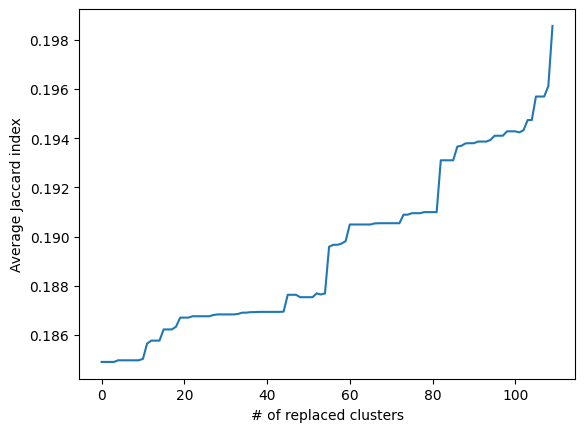

In [23]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [24]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.32705247 the next cluster is too wide and wont be replaced: ['hell', 'four', 'must', 'dumb', 'think', 'although', 'surprised', 'bad', 'mind', 'life', 'whether', 'leave', 'unfortunately', 'give', 'know', 'else', 'day', 'people', 'basically', 'definitely', 'take', 'night', 'apparently', 'dude', 'especially', 'many', 'go', 'well', 'maybe', 'unless', 'turn', 'look', 'sure', 'rather', 'would', 'swear', 'matter', 'however', 'stupid', 'speak', 'obviously', 'forget', 'right', 'might', 'since', 'probably', 'able', 'either', 'need', 'mean', 'enough', 'soon', 'first', 'yesterday', 'make', 'find', 'whole', 'say', 'tell', 'already', 'damn', 'next', 'seriously', 'five', 'today', 'thing', 'hope', 'another', 'anyone', 'guess', 'perhaps', 'certainly', 'something', 'everything', 'ever', 'understand', 'second', 'anymore', 'crazy', 'way', 'nothing', 'much', 'anyway', 'except', 'could', 'see', 'remind', '

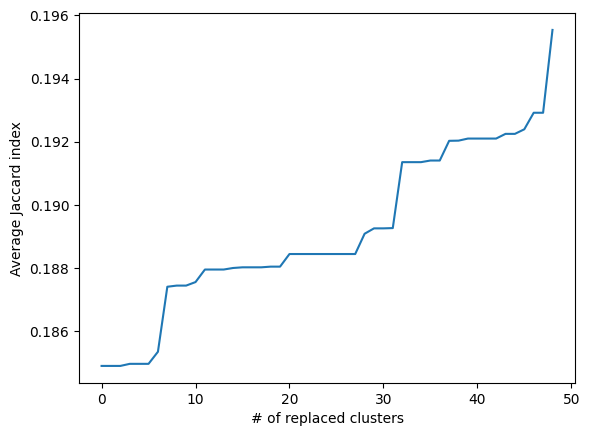

In [26]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [27]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just crap : this was possibly the bad book i h...,(just) [crap] (this) (was) possibly (the) {bad...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] really small, (it) {..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.18490998931057948
Distance threshold: 0.3036462366580963
distance: 0.33157736 the next cluster is too wide and wont be replaced: ['clifford', 'brown', 'robert', 'christian', 'julia', 'wendy', 'romero', 'ron', 'nick', 'captain', 'abraham', 'joseph', 'perry', 'usher', 'miller', 'gilbert', 'stevie', 'jefferson', 'clint', 'johnson', 'joe', 'jordan', 'reed', 'ann', 'prince', 'courtney', 'albert', 'phillip', 'duke', 'rip', 'christine', 'tony', 'paul', 'mrs', 'clark', 'quentin', 'rebecca', 'keith', 'shin', 'michael', 'turner', 'jack', 'saint', 'gabriel', 'wayne', 'duncan', 'patrick', 'henry', 'mason', 'carter', 'charlie', 'nelly', 'kelly', 'john', 'lisa', 'mr', 'cher', 'smith', 'sung', 'elizabeth', 'chandler', 'julie', 'mario', 'mark', 'james', 'thomas', 'ray']
distance: 0.3765713 the next cluster is too wide and wont be replaced: ['bean', 'henny', 'cat', 'lamb', 'chocolate', 'recipe', 'tea', 'rice', 'dog', 'cook', 'cake', 'flavor', 'meat', 'food', 'rabbit', 

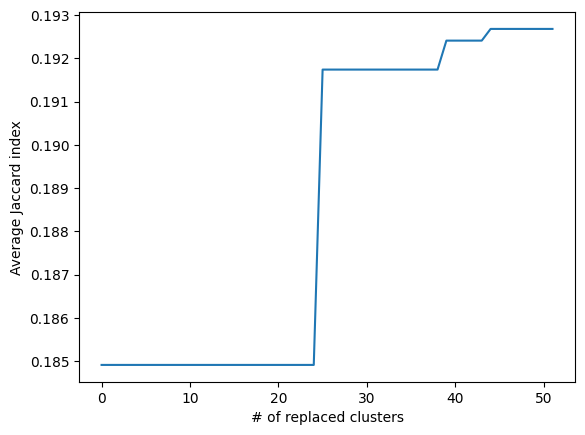

In [28]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [29]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
1,461,just awful: this was possibly the worst book i...,0,25,just awful : this was possibly the bad book i ...,(just) [crap] (this) (was) possibly (the) {bad...
2,493,no lessons learned: this is one of the most di...,0,23,no lesson learn : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] really small, (it) {..."
...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i buy it . ...,video purchase: like (the) movie (so) (i) {buy...


For eucledian distance

In [41]:
protected, lemma, replaced, all = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all}')

Protected: 135	Lemmatized: 970	 Replaced: 350	 All: 3311


Looking at the histogram again

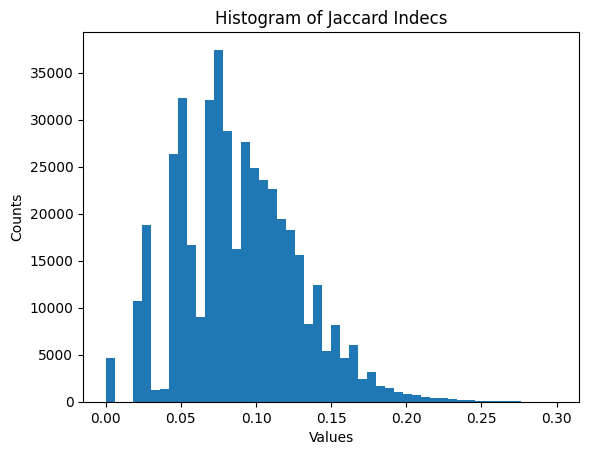

CPU times: total: 7.73 s
Wall time: 7.97 s


In [30]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

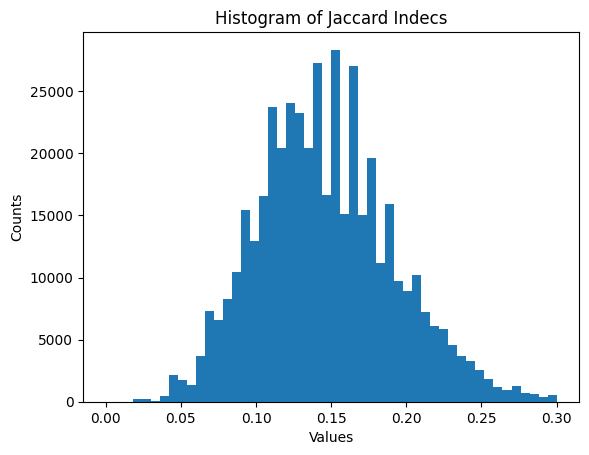

CPU times: total: 7.94 s
Wall time: 8.15 s


In [31]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

In [32]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 squeem : i order accord to the size chart for my measurement and it was way to small ! ! very uncomfortable.i return it ,
Cosine dist:		 squeem : i order accord to the size chart for my measurement and it was way to small ! ! very uncomfortable.i return it ,
HDNSCAN:		 squeem : i order accord to the size chart for my measurement and it was way to small ! ! very uncomfortable.i return it ,


In [59]:
nlp_utils.get_stat(word_dict_2)

(135, 970, 350, 3311)

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [34]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


After replacement

In [35]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [47]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [48]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking! 	len(used_indexes) 2 	len(docs) 3 	len(docs)-k 1
unused_indexes: [2]
End: get_anonym_degree: 1


['I love *', 'I love *', '*']

In [94]:
force_anon_txt_annoy = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 298]
similar_doc_ind [1, 265]
similar_doc_ind [2, 754]
similar_doc_ind [3, 246]
similar_doc_ind [4, 534]
similar_doc_ind [5, 876]
similar_doc_ind [6, 228]
similar_doc_ind [7, 424]
similar_doc_ind [8, 220]
similar_doc_ind [9, 771]
similar_doc_ind [10, 12]
similar_doc_ind [11, 369]
similar_doc_ind [13, 384]
similar_doc_ind [14, 408]
similar_doc_ind [15, 314]
similar_doc_ind [16, 231]
similar_doc_ind [17, 374]
similar_doc_ind [18, 385]
similar_doc_ind [19, 370]
similar_doc_ind [20, 213]
similar_doc_ind [21, 355]
similar_doc_ind [22, 581]
similar_doc_ind [23, 784]
similar_doc_ind [24, 728]
similar_doc_ind [25, 372]
similar_doc_ind [26, 140]
similar_doc_ind [27, 653]
similar_doc_ind [28, 143]
similar_doc_ind [29, 77]
similar_doc_ind [30, 516]
similar_doc_ind [31, 159]
similar_doc_ind [32, 34]
similar_doc_ind [33, 436]
similar_doc_ind [35, 40]
similar_doc_ind [36, 615]
similar_doc_ind [37, 590]
similar_doc_ind [38, 501]
similar_doc_ind [39, 287

(1, [[705], [693], [916], [134], [698], [133], [702]])

In [91]:
print([394, 602])
print(df_2['anon_txt'][394])
print(force_anon_txt_annoy[394])
print()
print(df_2['anon_txt'][602])
print(force_anon_txt_annoy[602])

[394, 602]
skin art : i think this was a very poorly write movie ; it could have and should have been a lot well . the acting was also poor .
* * : i think this was a very * * movie ; it * have and should have been a * * . the acting was also * .

great movie : i think it was a very entertaining movie , should have get more launch when it come out . very good acting also
* movie : i think it was a very * movie , should have * more * when it * out . very * acting also


In [67]:
arr, voc = anonym_utils.get_bow([force_anon_txt_annoy[394], force_anon_txt_annoy[602]])
print(voc)
print(arr.toarray())

token: think word: think lemma: think
token: movie word: movie lemma: movie
token: acting word: acting lemma: acting
token: also word: also lemma: also
token: movie word: movie lemma: movie
token: think word: think lemma: think
token: movie word: movie lemma: movie
token: acting word: acting lemma: act
token: also word: also lemma: also
cc:
 ['think movie acting also', 'movie think movie act also']
['act' 'acting' 'also' 'movie' 'think']
[[0 1 1 1 1]
 [1 0 1 2 1]]


In [85]:
arr, voc = anonym_utils.get_bow([force_anon_txt_annoy[165], force_anon_txt_annoy[110]])
print(voc)
print(arr.toarray())

cc:
 ['disappoint purchase', 'disappoint purchase']
['disappoint' 'purchase']
[[1 1]
 [1 1]]


In [50]:
df_2['force_anon_txt'] = force_anon_txt_annoy

## 5) Utilization tests

In [51]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,force_anon_txt,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...","* ! : these * are not the "" original "" version...",0.0000,-0.1957,-0.1957
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was possibly the bad book i ...,(just) [worse] (this) (was) possibly (the) {ba...,just * : this was * the bad book i have ever r...,-0.5574,-0.2023,-0.5423
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,no lesson * : this is one of * most * * i have...,-0.5563,-0.0258,-0.2960
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,* : i order * to the size * for my * and it wa...,0.0000,0.0000,0.0000
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size run really small , it bag up e...","pass: (the) {size} run really small, (it) {fli...","* : the size * * * , it bag up * * , they * it...",0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,excellent : * * . * * . you can not do * with ...,0.8622,0.9020,0.8748
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,* * * * 3 * from amazon.com . : the * was * wh...,0.0000,0.0000,0.0000
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,* * * * : this * is * for * when you do not ha...,0.7841,0.7841,0.4201
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : like the movie so i free it ....,video purchase: like (the) movie (so) (i) {buy...,* purchase : * the * so i * it . * the * in gr...,0.8655,0.9317,0.6249


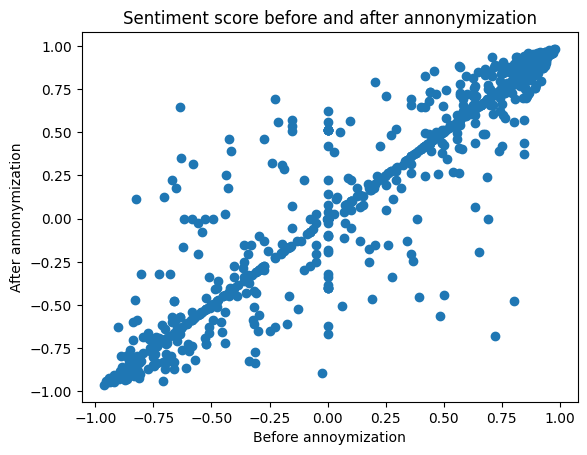

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


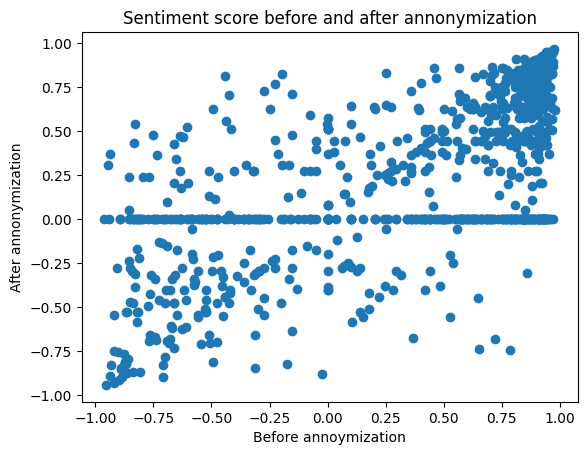

In [53]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [54]:
utilization_utils.sentiment_test(df_2, 'txt')

637    great cd: i love love love this cd. i dont spe...
104    lots of errors!!!: this book was a good refres...
432    good bye mog:-(: this book is a tear inducing ...
330    very bad blu ray transfer: i like the movie. b...
26     not for me.: thought it was poorly written. th...
                             ...                        
421    i really do like women just not these: i just ...
160    of mice and men: i thought this book was prett...
376    pollenex: i was really looking forward to this...
284    worthless: both the original and the replaceme...
569    i love my card holders: it makes so much easie...
Name: txt, Length: 756, dtype: object


0.7991394927536232

In [55]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

817    great read : free this for my woman . she love...
219    boring : this book was totally boring . even t...
713    a favorite : this was my this collins o'connor...
701    excellent ! : does not leak , this for a long ...
945    freakin ' funny ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ...
                             ...                        
280    not that great : as a history buff , i was dis...
328    sad ! : i think this was a great book because ...
912    this addition to my doomsday collection : the ...
389    this book depress me to the point of outside s...
551    easy climax : i be very pleased with this incl...
Name: anon_txt, Length: 756, dtype: object


0.8163496376811594

The fully anonymized text gets he highest accuracy score!

In [56]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

704    love it : * what you * for * * free * i will *...
6      too small : rarely a size * to s but this * 's...
855    good movie : if you * * then you will * this m...
252    if you like this * of * .... : if you think th...
423    a * : trade * * with the * for which i had * t...
                             ...                        
541    love it : great movie ! ! ! * is a great * i *...
455    good : i * this book . * * * and * , * you go ...
607    * book ! : a * have for those want to know abo...
272    not the * work : this * is not the * * . it is...
319    not * : well , this was not a * * copy of the ...
Name: force_anon_txt, Length: 756, dtype: object


0.7001811594202898

In [57]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
len(nlp_utils.stopwords.words('english'))

179